Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


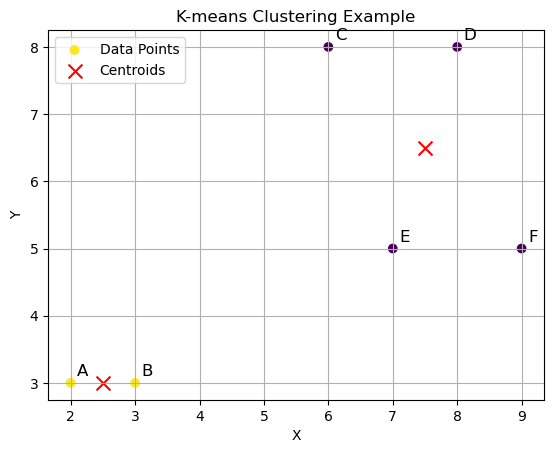

In [8]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
 
# Define the data points (A, B, C, D, E, F)

data = np.array([

    [2, 3],  # Point A

    [3, 3],  # Point B

    [6, 8],  # Point C

    [8, 8],  # Point D

    [7, 5],  # Point E

    [9, 5]   # Point F

])
 
# Perform K-means clustering with K=2

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
 
# Get the cluster centers (centroids) and labels

centroids = kmeans.cluster_centers_

labels = kmeans.labels_
 
# Print the final centroids and cluster assignments

print("Final Centroids (Cluster Centers):")

print(centroids)
 
print("\nCluster Assignments:")

for i, label in enumerate(labels):

    print(f"Point {chr(65+i)}: Cluster {label+1}")
 
# Plot the data points and the centroids

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
 
# Annotate points

for i, point in enumerate(data):

    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')

plt.xlabel('X')

plt.ylabel('Y')

plt.legend()

plt.grid(True)

plt.show()

 

In [9]:
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
data=pd.read_csv('kmeans_dataset_with_outliers.csv')
data

,X,Y,Label
0,1.248357,1.760413,Cluster 1
1,0.930868,1.907171,Cluster 1
2,1.323844,1.446833,Cluster 1
3,1.761515,1.401897,Cluster 1
4,0.882923,2.406263,Cluster 1
...,...,...,...
195,-22.261882,-31.187884,Outlier
196,-3.630160,-14.664777,Outlier
197,8.365611,-42.226536,Outlier
198,47.439481,48.621074,Outlier


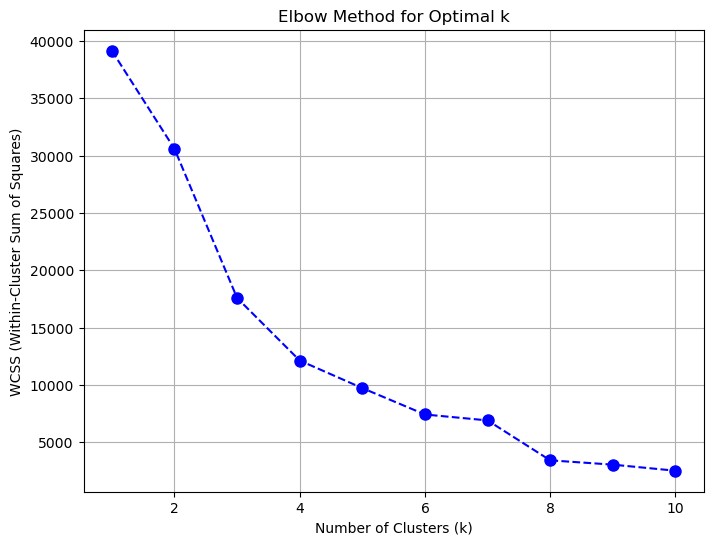

Cluster Centers:
[[  1.83339357   3.02193672]
 [  5.60077105  44.70614033]
 [-33.85862183 -26.54578253]
 [-24.53460376  41.59108338]
 [ 46.5737542   -5.10157882]
 [  8.36561119 -42.2265363 ]
 [  6.61613535   7.18494117]
 [ 46.24031459  43.82372642]
 [-42.62034353   5.38542844]
 [-47.23428067  43.05109702]]


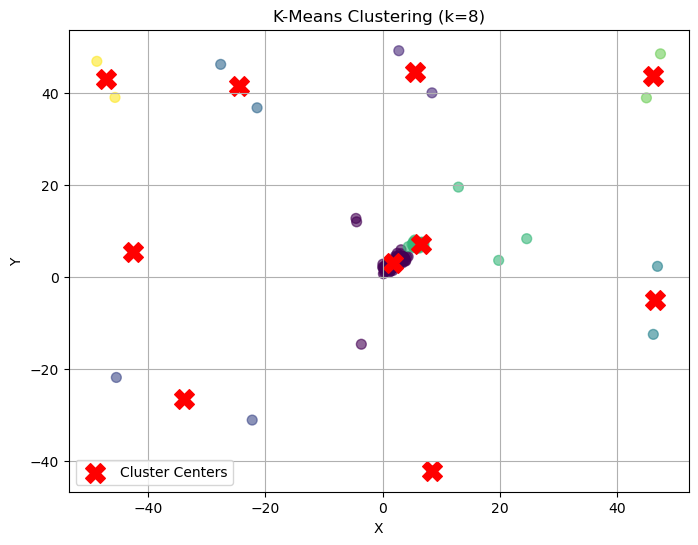

In [10]:

X = data[['X', 'Y']]

# Elbow Method to find the optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Select optimal k based on elbow point
optimal_k = 8  # Adjust this based on the elbow plot

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.grid(True)
plt.legend()
plt.show()

# Save the clustered data
data.to_csv('clustered_data.csv', index=False)